In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

**level 1**

In [2]:
# nomer 1.1
df = pd.read_csv('https://raw.githubusercontent.com/inzanagi12/dataset1_kapal/refs/heads/main/data_kapal_titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [3]:
# nomer 1.2
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
deck,object


In [4]:
# nomer 1.3
df.shape

(891, 9)

In [5]:
# nomer 1.4
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
deck,688


In [6]:
# nomer 1.5
df.age.isnull().sum()

np.int64(177)

In [7]:
# bonus
df['age'].fillna(df['age'].mean(), inplace=True)


/tmp/ipython-input-3473251429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [8]:
df.drop(columns=['deck']).inplace=True

**Level 2**

In [9]:
# nomer 2.1
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


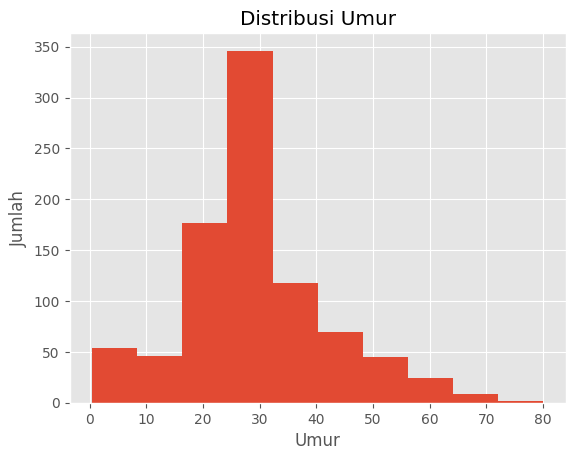

In [10]:
# nomer 2.2
plt.hist(df['age'])
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

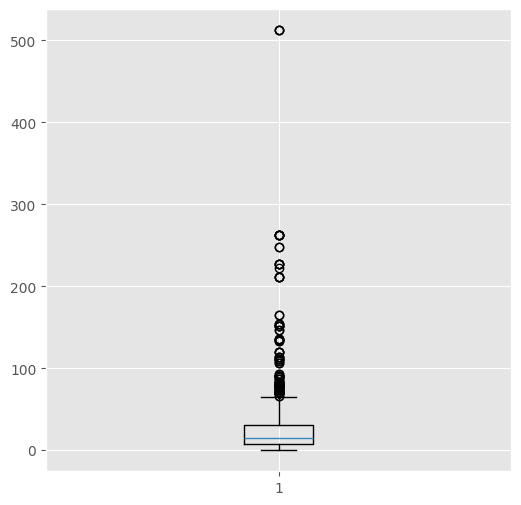

In [11]:
# nomer 2.3
plt.figure(figsize=(6,6))
plt.boxplot(df['fare'])
plt.show()

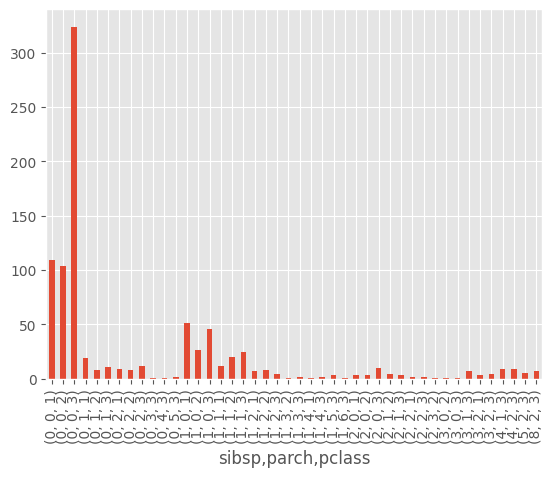

In [12]:
# nomer 2.4
total_penumpang = df.groupby(['sibsp', 'parch'])['pclass'].value_counts().sort_index()
total_penumpang.plot(kind='bar')
plt.show()

**Level 3**

In [13]:
# nomer 3.1
selamat = (df.survived == 1).mean() * 100
print(selamat, '%')
tidak_selamat = (df.survived == 0).mean() * 100
print(tidak_selamat, '%')

38.38383838383838 %
61.61616161616161 %


In [14]:
# nomer 3.2
df.groupby('survived')['sex'].value_counts()

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [15]:
# nomer 3.3
df.groupby('survived')['pclass'].value_counts().sort_index()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: count, dtype: int64

In [16]:
# nomer 3.4
df.groupby(['survived', 'sex'])['age'].mean()

survived  sex   
0         female    26.023272
          male      31.175224
1         female    28.979263
          male      27.631705
Name: age, dtype: float64

**Level 4**

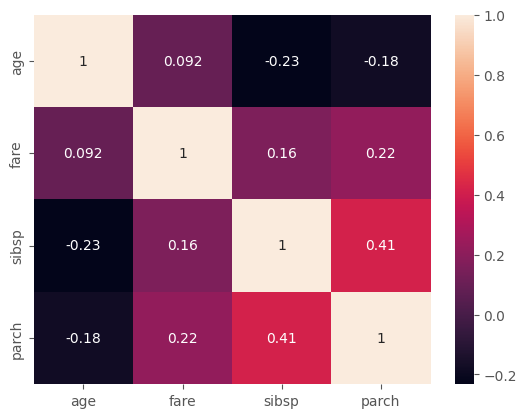

In [17]:
# nomer 4.1 dan 4.2
df_corr = df[['age', 'fare', 'sibsp', 'parch']].corr()
sns.heatmap(data=df_corr, annot=True)
plt.show()

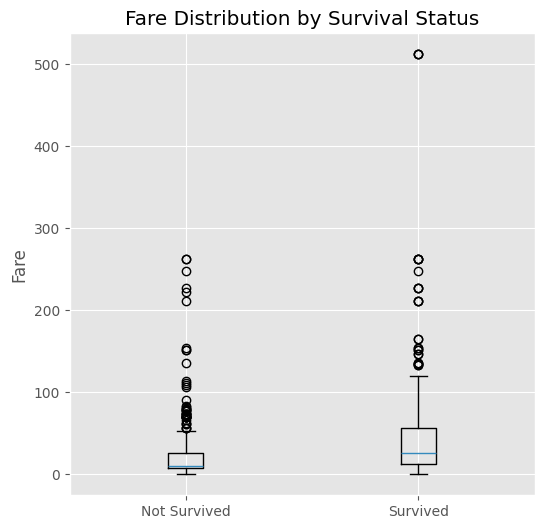

In [18]:
plt.figure(figsize=(6,6))
data_to_plot = [df['fare'][df['survived'] == 0], df['fare'][df['survived'] == 1]]
plt.boxplot(data_to_plot, tick_labels=['Not Survived', 'Survived'])
plt.title('Fare Distribution by Survival Status')
plt.ylabel('Fare')
plt.show()

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [20]:
df.embarked.fillna('C').inplace=True

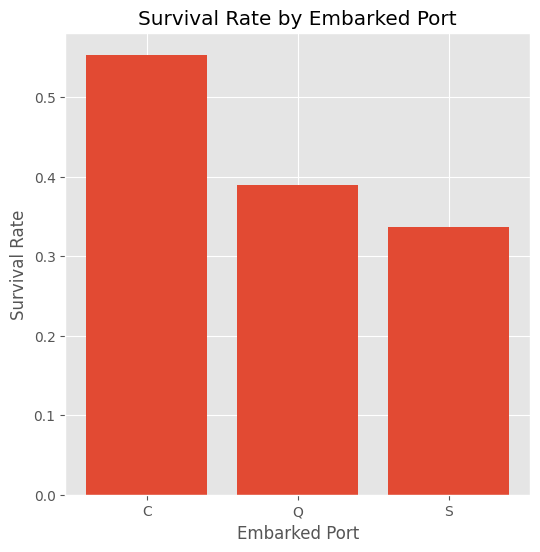

In [21]:
plt.figure(figsize=(6,6))
# Calculate the mean survival rate for each embarked port
survival_rate_by_embarked = df.groupby('embarked')['survived'].mean()

# Plotting the bar chart
plt.bar(survival_rate_by_embarked.index, survival_rate_by_embarked.values)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

**Level 5**

In [22]:
df['FamilySize'] = df.sibsp + df.parch + 1
df.FamilySize

,FamilySize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [23]:
df['IsAlone'] = df.FamilySize == 1
print(df.IsAlone.sum())

537


In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,NaN,2,False
1,1,1,female,38.0,1,0,71.2833,C,C,2,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,1,True
3,1,1,female,35.0,1,0,53.1000,S,C,2,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,1,True


In [25]:
kelompok = [0, 13, 20, 61, np.inf]
label = ['anak kecil', 'remaja', 'dewasa', 'orangtua']
df['age_bins'] = pd.cut(df.age, kelompok, labels=label)
df.age_bins.value_counts().sort_index()

,count
age_bins,
anak kecil,71
remaja,108
dewasa,693
orangtua,19


In [26]:
analytic_survival = df.groupby('survived')[['FamilySize', 'IsAlone', 'age_bins']].value_counts()
analytic_survival

survived  FamilySize  IsAlone  age_bins  
0         1           True     dewasa        316
          2           False    dewasa         62
          1           True     remaja         46
          3           False    dewasa         32
          1           True     orangtua       11
                                            ... 
1         11          False    orangtua        0
                      True     anak kecil      0
                               remaja          0
                               dewasa          0
                               orangtua        0
Name: count, Length: 144, dtype: int64

In [27]:
df.sex.value_counts()

,count
sex,
male,577
female,314


In [28]:
# apakah penumpang wanita lebih banyak yang selamat di banding laki laki?
df.groupby('survived')['sex'].value_counts()

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [29]:
df.groupby('sex')['pclass'].value_counts().sort_index()

sex     pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: count, dtype: int64

In [30]:
df.groupby(['survived', 'sex'])['pclass'].value_counts().sort_index()

survived  sex     pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: count, dtype: int64

In [31]:
spesifikasi = df.groupby(['survived', 'sex', 'pclass'])[['sibsp', 'parch']].sum()
spesifikasi

sibsp  parch
survived sex    pclass              
0        female 1           2      4
                2           3      1
                3          93     79
         male   1          21     20
                2          28     13
                3         157     64
1        female 1          50     39
                2          34     45
                3          36     36
         male   1          17     14
                2           9     11
                3          16     14

In [32]:
df.groupby(['survived' , 'pclass', 'sex'])['age_bins'].value_counts().sort_index()

survived  pclass  sex     age_bins  
0         1       female  anak kecil      1
                          remaja          0
                          dewasa          2
                          orangtua        0
                  male    anak kecil      0
                          remaja          3
                          dewasa         65
                          orangtua        9
          2       female  anak kecil      0
                          remaja          0
                          dewasa          6
                          orangtua        0
                  male    anak kecil      0
                          remaja          9
                          dewasa         80
                          orangtua        2
          3       female  anak kecil     12
                          remaja         11
                          dewasa         49
                          orangtua        0
                  male    anak kecil     16
                          remaja         45
                          dewasa        236
                          orangtua        3
1         1       female  anak kecil      0
                          remaja         13
                          dewasa         76
                          orangtua        2
                  male    anak kecil      3
                          remaja          1
                          dewasa         40
                          orangtua        1
          2       female  anak kecil      9
                          remaja          7
                          dewasa         54
                          orangtua        0
                  male    anak kecil      9
                          remaja          1
                          dewasa          6
                          orangtua        1
          3       female  anak kecil     12
                          remaja         12
                          dewasa         47
                          orangtua        1
                  male    anak kecil      9
                          remaja          6
                          dewasa         32
                          orangtua        0
Name: count, dtype: int64

In [33]:
# korban yang paling banyak selamat itu ada di perempuan dengan intensitas lebih tinggi
# walaupun dari data lebih banyak laki laki dibanding perempuan, namun ketika di check
# lebih banyak wanita yang selamat dibanding laki laki

# ini mungkin bisa dipengaruhi oleh tingkat kelas di kapal sertabeban evakuasi pada sibsp atau parch
# lalu bisa dilihat juga bahwa rata rata yang selamat itu kebanyakan dewasa di banding remaja
#  orangtua, mapun anak kecil